<img style="float: center; margin: 10px 30px 30px 150px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="500" /> 



# Real Options Project



### Team members:
- Gerardo Gutiérrez Estrada
- Ricardo Rodriguez Salcedo
- Pablo Lemus
- Bernardo Ramirez
- Andres Rubio

##### Date: May 4th, 2023

#### **Quantitative Finance**
##### Professor: **Jose Mario Zarate Carbajal**

### ¿What are real options?

According to an article published by EGADE Business School, a real option can be defined as, "The right, but not the obligation, to take, expand, delay, or abandon a project, with a fixed investment, and a strike price during a given time." Real options are a tecnique utilized to evaluate investment projects, rather than considering an investment as a one time irreversible decision, the evaluation of real options recognizes that an investment can have additional options in the future, which have value. 

An example of this are call options which give the buyer the right but no the obligation to buy a stock at a certain strike price. In investment projects outside of the financial derivatives market, such as real estate, research and development, and basically every real life decision. Real options can be calculated by utilizing net present value, and that is how it is done in most projects around the world, the downside to this is it does not consider stochastic variables, and makes to many assumptions that can derail projects and not give your the results you expect.

The Black-Scholes model is used to calculate the fair price of financial options, but it is also a way we can model real options and actually consider the stochastice part of an investment project.

### Introduction

We are going to analyze a situation that can that could present itself in all of our lives, deciding whether to rent or to buy a house. Mexican culture values home ownership, because it brings peace and a sense of accomplishment, but is it truly a good financial decision? Renting a house allows you to invest the money your are not spending on a monthly mortgage payment, considering that mortgage rates are high and loan duration is usually shorter than the United States and countries in Europe, therefore mortgage payments will always be higher than rent.

**The data we are going to use to initially evaluate the net present value of our option is of the Solares area in Zapopan, Jalisco.**

- Average sale price: 36,933 pesos per square meter
- Average rent price: 191 pesos per square meter
- Using a 100 square meter apartment with a value of $3,693,300 pesos, that would have a rental value of 19,100 pesos a month.
- An interest rate of 11.7%, which is the rate given by BBVA in Jalisco today.
- A loan duration of 20 years, which is the longest loan offered by BBVA.
- With these values we used a loan simulator to calulate a montly mortgage payment of 39,896.63 pesos.
- A risk free rate of  11.4% based on one month CETES.
- We will also consider that the 100% of the difference between the loan payment and rent will be invested, a total of 20,796.63 a month.

<img style="float: center;" src="https://assets.rew.ca/news-article-image/3209/1579_iStock-1271128053.jpg" width="500" /> 

In [1]:
import pandas as pd
from array import array

#### Present Value of Buying Apartment

In [2]:
valor_inmueble=3693300
renta=19100
pago_credito=39896.63
plazo=240
rf=0.114
plusvalia= 0.14

outflows_compra=[]
vp=[]

## Calcular plusvalia inmueble

valor_futuro_inmueble = valor_inmueble * (((1 + ((plusvalia)/1)) ** (1*20)))
valor_presente_con_plusvalia= valor_futuro_inmueble/(1+rf)**(20)

for i in range(plazo):
    outflows_compra.append(-pago_credito)
    vp.append(outflows_compra[i]/(1+rf)**((i+1)/12))
 

data = {
    "outflows": outflows_compra,
    "Present Value": vp
}

print("Net Present Value:",'${:,.2f}'.format(valor_presente_con_plusvalia + sum(vp)))

df = pd.DataFrame(data)
df

Net Present Value: $1,953,561.81


,outflows,Present Value
0,-39896.63,-39539.312523
1,-39896.63,-39185.195210
2,-39896.63,-38834.249402
3,-39896.63,-38486.446692
4,-39896.63,-38141.758932
...,...,...
235,-39896.63,-4773.762332
236,-39896.63,-4731.008127
237,-39896.63,-4688.636832
238,-39896.63,-4646.645017


#### Present Value of Renting and Investing the difference from loan payment

In [3]:
renta=19100

inflows_renta=[]
interes=[]
total=[]
vp_renta=[]
incremento_renta_anual= 0.05
interes_renta=rf

for i in range(plazo):
    if(i%12==0):
        renta=renta*(1+incremento_renta_anual)
    inflows_renta.append(pago_credito-renta)
    interes.append(sum(inflows_renta) * (interes_renta/12))
    total.append(inflows_renta[i] + interes[i])
    vp_renta.append(total[i]/(1+rf)**((i+1)/12))

data = {
    "Inflows": inflows_renta,
    "Interest": interes,
    "Total": total,
    "Present Value": vp_renta
}

print("Net Present Value:",'${:,.2f}'.format(sum(vp_renta)))

df = pd.DataFrame(data)
df

Net Present Value: $2,200,110.45


,Inflows,Interest,Total,Present Value
0,19841.630000,188.495485,20030.125485,19850.734045
1,19841.630000,376.990970,20218.620970,19858.083492
2,19841.630000,565.486455,20407.116455,19863.709040
3,19841.630000,753.981940,20595.611940,19867.640977
4,19841.630000,942.477425,20784.107425,19869.909188
...,...,...,...,...
235,-10781.356168,15776.309048,4994.952879,597.662457
236,-10781.356168,15673.886164,4892.529996,580.164269
237,-10781.356168,15571.463280,4790.107112,562.931572
238,-10781.356168,15469.040397,4687.684229,545.961014


Utilizing net present value to make a decision can only get you so far, you have to consider the volatility involved in order to accurately project your results. For this we will use the Black-Scholes model for calculating the fair price of an option, in this case a binary call option.


## Initial Variables: 

* $$K = \text{Credit Loan}$$

* $$St = \text{House Price in t time}$$

* $$K2= \text{Total Rent Payment}$$

* $$r= \text{Risk Free Rate}$$

* $$T= \text{Number of years in future}$$


## First we have the $f_T$ of the option, in this case it is:



$$Call^{CN}= \left\{ \begin{array}{lcc}
             S_T-K  & ST \geq (K-K2)*(1+r)^T+K \\
             \\(K-K2)*(1+r)^T & S_T < (K-K2)*(1+r)^T+K
             \end{array}
\right.$$


we replace 
$$K3=(K-K2)*(1+r)^T$$


And we get

$$Call^{CN}= \left\{ \begin{array}{lcc}
             S_T-K  & S_T \geq K3 \\
             \\ K3 & S_T < K3
             \end{array}
   \right.$$

Now we apply $ln$ to the $f_T$
$$Call^{CN}= \left\{ \begin{array}{lcc}
            S_T-K  & ln(S_T) \geq ln(K3) \\
             \\ K3 & ln(S_T) < ln(K3)
             \end{array}
   \right.$$

Then we replace $x=ln(S_T)$ to simplify
$$Call^{CN}= \left\{ \begin{array}{lcc}
            S_T-K  & x \geq ln(K3) \\
             \\ K3 & x < ln(K3)
             \end{array}
   \right.$$

Take Black & Scholes solution that is:
$$f_t=e^{-r(T-t)}E[f_{T}(x,t)]$$

Take the model 2 equation
$$S_T=S_te^{(\mu-\frac{\sigma^2}{2})(T-t)+\sqrt{T-t}(\sigma W_n)}$$

Then we apply $ln$ to the model 2 equation
$$ln(S_T)=ln(S_te^{(\mu-\frac{\sigma^2}{2})(T-t)+\sqrt{T-t}(\sigma W_n)})$$

Apply $ln$ properties to separate the multiplication into a $ln$ sum
$$ln(S_T)=ln(S_t)+ln(e^{(\mu-\frac{\sigma^2}{2})(T-t)+\sqrt{T-t}(\sigma W_n)})$$

$ln(e^x)$ is equal to x. So we eliminate the $ln$ and $e$ of the second $ln$
$$ln(S_T)=ln(S_t)+(\mu-\frac{\sigma^2}{2})(T-t)+\sqrt{T-t}(\sigma W_n)$$

The unique value of the function that is stochastic is the $W_n$ that has a Standard  Normal Distribution, $W_n \sim N(0,1)$. First apply the Expected Value ($E$).
$$E[ln(S_T)]=E[ln(S_t)+(\mu-\frac{\sigma^2}{2})(T-t)+\sqrt{T-t}(\sigma W_n)]$$

Expand.
$$E[ln(S_T)]=E[ln(S_t)]+E[(\mu-\frac{\sigma^2}{2})(T-t)]+E[\sqrt{T-t}(\sigma W_n)]$$

Replace $W_n$ with his expected value (0).
$$E[ln(S_T)]=E[ln(S_t)]+E[(\mu-\frac{\sigma^2}{2})(T-t)]+E[\sqrt{T-t}(\sigma 0)]$$

Change $\mu$ to $r$ and we get the Expected Value is:
$$E[ln(S_T)]=ln(S_t)+(r-\frac{\sigma^2}{2})(T-t)$$

Next we get the Variance ($Var$).
$$Var[ln(S_T)]=Var[ln(S_t)+(\mu-\frac{\sigma^2}{2})(T-t)+\sqrt{T-t}(\sigma W_n)]$$

Expand.
$$Var[ln(S_T)]=Var[ln(S_t)]+Var[(\mu-\frac{\sigma^2}{2})(T-t)]+Var[\sqrt{T-t}(\sigma W_n)]$$

Replace $W_n$ with his variance (1)
$$Var[ln(S_T)]=Var[ln(S_t)]+Var[(\mu-\frac{\sigma^2}{2})(T-t)]+Var[\sqrt{T-t}(\sigma 1)]$$

The variance of constants is equal to 0 and the other variables that are multiplying the $W_n$ get out of the Variance squared.
$$Var[ln(S_T)]=(\sqrt{T-t}(\sigma))^2$$

The Variance is:
$$Var[ln(S_T)]=(T-t)\sigma^2$$

Now we now that $x \sim N(ln(S_t)+(r-\frac{\sigma^2}{2})(T-t), (T-t)\sigma^2)$

The Black Scholes solution +Krequires the $E[f_T(x,t)]$ that is $E[w]=\int^{\infty}_{-\infty}wF(w)dw$. So we apply it to the $f_t$.
$$f_t=e^{-r(T-t)}\left[\int^{\infty}_{-\infty}f_Tp(x)dx\right]$$




## empezamos a resolverla


Expand $f_T$.
$$f_t=e^{-r(T-t)}\left[\int^{ln(K3)}_{-\infty}K3p(x)dx+\int^{\infty}_{ln(K3)}(St-K)p(x)dx\right]$$


expand the integrals.
$$f_t=e^{-r(T-t)}\left[\int^{ln(K3)}_{-\infty}K3 p(x)dx+\int^{\infty}_{ln(K3)}St p(x)dx-\int^{\infty}_{ln(K3)}K p(x)dx\right]$$

The Probability Density Function is:
$$p(x)=\frac{e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2}}{\sqrt{2 \sigma^2 \pi}}$$

Replacing the $\mu$ and $\sigma$
$$p(x)=\frac{e^{-\frac{1}{2} (\frac{x-(ln(S_t)+(r-\frac{\sigma^2}{2})(T-t))}{((T-t)\sigma^2)})^2}}{\sqrt{2 ((T-t)\sigma^2)^2 \pi}}$$

Then we have
$$f_t=e^{-r(T-t)}\left[\int_{-\infty}^{ln(k3)}K3 \frac{e^{-\frac{1}{2}\left(\frac{x-[ln(K3)+\left(r-\frac{\sigma^2}{2}\right)(T-t)]}{\sigma_x \sqrt{T-t}}\right)^2}}{\sqrt{2\pi \sigma^2_x (T-t)}}dx+\int_{ln(K3)}^{\infty}St \frac{e^{-\frac{1}{2}\left(\frac{x-[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)]}{\sigma_x \sqrt{T-t}}\right)^2}}{\sqrt{2\pi \sigma^2_x (T-t)}}dx-\int_{ln(K3)}^{\infty}k \frac{e^{-\frac{1}{2}\left(\frac{x-[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)]}{\sigma_x \sqrt{T-t}}\right)^2}}{\sqrt{2\pi \sigma^2_x (T-t)}}dx\right]$$

Simplify to get Standard Normal Distribution

The Standard Form of Normal Distribution is $N(w_1)=\int_{-\infty}^{w_1} \frac{e^{-\frac{1}{2}w^2}}{\sqrt{2\pi}}dw$

So we do a change of variables, we define 
$$y=\frac{x-[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)]}{\sigma_x \sqrt{T-t}}$$

Then evaluate the limits and get the diferential of the new variable $y$:

we have to find x in terms of y
$$x=y\sigma_x \sqrt{T-t} + \left[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)\right]$$

replacing x with limit ln(K+3) 
$$y_l=\frac{ln(K3)-[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)]}{\sigma_x \sqrt{T-t}}$$

Multiply by -1
$$y_l=-\frac{ln(K3)-[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)]}{\sigma_x \sqrt{T-t}}$$

Apply $ln$ properties.
$$y_l=-\frac{ln(\frac{S_t}{K3})+\left(r-\frac{\sigma^2}{2}\right)(T-t)}{\sigma_x \sqrt{T-t}}$$

Define this as $-d2$
$$y_l=-d2$$

limit when $\infty$
$$y_u=\infty$$

limit when $-\infty$
$$y_u=-\infty$$

Find diferential
$$\frac{dy}{dx}=\frac{1}{\sigma_x \sqrt{T-t}}$$
$$dx=dy(\sigma_x \sqrt{T-t})$$




Change the variables to the integral
$$f_t=e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{K3 e^{-\frac{1}{2}y^2}}{\sqrt{2\pi} \sigma_x \sqrt{T-t}}dy(\sigma_x \sqrt{T-t})+\int_{-d2}^{\infty} \frac{St e^{-\frac{1}{2}y^2}}{\sqrt{2\pi} \sigma_x \sqrt{T-t}}dy(\sigma_x \sqrt{T-t})-\int_{-d2}^{\infty} \frac{K e^{-\frac{1}{2}y^2}}{\sqrt{2\pi} \sigma_x \sqrt{T-t}}dy(\sigma_x \sqrt{T-t})\right]$$

Simplify
$$f_t=e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{K3 e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy+\int_{-d2}^{\infty} \frac{St e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy-\int_{-d2}^{\infty} \frac{K e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]$$

we replace St to X so is $e^x$

$$f_t=e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{ K3{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy+\int_{-d2}^{\infty} \frac{e^x e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy-\int_{-d2}^{\infty} \frac{K e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]$$

replace x with the found value
$$f_t=e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{K3 e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy+\int_{-d2}^{\infty} \frac{ e^{y\sigma_x \sqrt{T-t} + \left[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)-\frac{1}{2}y^2\right]}}{\sqrt{2\pi}}dy-\int_{-d2}^{\infty} \frac{K e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]$$

Now get out the value of euler to simplified
$$-\frac{1}{2}y^2 + y\sigma_x \sqrt{T-t} + \left[ln(S_t)+\left(r-\frac{\sigma^2}{2}\right)(T-t)\right]$$

Expand
$$-\frac{1}{2}y^2 + y\sigma_x \sqrt{T-t} + \left(r - \frac{\sigma^2}{2}\right)(T-t) + ln(S_t)$$ 
$$-\frac{1}{2}y^2 + y\sigma_x \sqrt{T-t} -\frac{\sigma^2}{2}(T-t) + r(T-t) + ln(S_t)$$

Make it a square of a binomial which form is
$$(a+b)^2=a^2+2ab+b^2$$

The $a=y$ and $b=\sigma_x \sqrt{T-t}$
$$(y+\sigma_x \sqrt{T-t})^2=y^2+2y\sigma_x \sqrt{T-t}+\sigma_x \sqrt{T-t}^2$$

We obtain
$$-\frac{1}{2}(y-\sigma_x \sqrt{T-t})^2+ r(T-t) + ln(S_t)$$





we replace them in the integrals
$$f_t=e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{K3 e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy+\int_{-d2}^{\infty} \frac{e^{-\frac{1}{2}(y-\sigma_x \sqrt{T-t})^2+ r(T-t) + ln(S_t)}}{\sqrt{2\pi} }dy-\int_{-d2}^{\infty} \frac{K e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]$$

Get out all the constants from the integral

$$f_t=-K3e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right])+(e^{-r(T-t)}e^{r(T-t)}e^{ln(S_t)}\left[\int_{-d2}^{\infty} \frac{e^{-\frac{1}{2}(y-\sigma_x \sqrt{T-t})^2}}{\sqrt{2\pi} }dy\right])-Ke^{-r(T-t)}\left[\int_{-d2}^{\infty} \frac{e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]$$

Simplify
$$f_t=K3e^{-r(T-t)}\left[\int_{-\infty}^{-d2} \frac{e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]+(St\left[\int_{-d2}^{\infty} \frac{e^{-\frac{1}{2}(y-\sigma_x \sqrt{T-t})^2}}{\sqrt{2\pi} }dy\right])-Ke^{-r(T-t)}\left[\int_{-d2}^{\infty} \frac{e^{-\frac{1}{2}y^2}}{\sqrt{2\pi}}dy\right]$$

We apply the simmetry normal distribution property and change the upper limit to the lower limit with a sign change.


Finally we got
$$f_t=K3e^{-r(T-t)} N(-d2)+(St\left[\int_{-d2}^{\infty} \frac{e^{-\frac{1}{2}(y-\sigma_x \sqrt{T-t})^2}}{\sqrt{2\pi} }dy\right])-Ke^{-r(T-t)} N(d2)$$







Apply another change of variables


$$z=y-\sigma_x \sqrt{T-t}$$

limit in -d2
$$z_l=-d2-\sigma_x \sqrt{T-t}$$


Define this as $-d1$
$$-d2-\sigma_x \sqrt{T-t}=-d1$$

limit when $\infty$
$$z_u=\infty$$

limit when -$\infty$
$$z_u=-\infty$$


Diferential
$$\frac{dz}{dy}=1$$
$$dy=dz$$

change the variables in the ecuationn

$$f_t=S=K3e^{-r(T-t)} N(-d2)+St \int^{\infty}_{-d1}\frac{e^-\frac{1}{2}z^2}{\sqrt{2\pi}}dz -Ke^{-r(T-t)} N(d2)$$



We apply the simmetry normal distribution property and change the upper limit to the lower limit with a sign change.
$$f_t=K3e^{-r(T-t)} N(-d2)+St \int^{d1}_{-\infty}\frac{e^-\frac{1}{2}z^2}{\sqrt{2\pi}}dz -Ke^{-r(T-t)} N(d2)$$



And finally we got


## $$f_t=K3e^{-r(T-t)} N(-d2)+S_t N(d1)-Ke^{-r(T-t)} N(d2)$$

For the fair price we´re going to replace $\theta$ for the $r$ in $d_2$.


### $$d2=\frac{ln(\frac{S_t}{K3})+\left(\theta-\frac{\sigma^2}{2}\right)(T-t)}{\sigma_x \sqrt{T-t}}$$


### $$d1= d2+\sigma_x \sqrt{T-t}$$





**Case**
>Suppose you are Financial Engineering graduate from ITESO, and we are analyzing our options on wheter we should apply for a loan from the bank to buy a house or to rent a house and invest the difference at the risk free rate.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from scipy.stats import multivariate_normal as mvn

In [5]:
sq=100 #Metros Cuadrados
St=36933*sq #Valor promedio de venta
k2=191*sq #Valor promedio de renta
k=39896.63 #Pago mensual de credito hipotecario
r=0.114 #Tasa libre de riesgo CETES 1 mes
sigma=0.45 #Volatilidad de las casas
t=0
T=20
theta= 0.19*T #Rendimiento de las casas


def FairValue(sq,St,k2,k,sigma,t,T,r):
    k3=(k-k2)*(1+r)**T #inversion en CETES
    d2=(np.log(St/k3)+(theta-((sigma**2)/2))*(T-t))/(sigma*np.sqrt(T-t))
    d1=d2+sigma*np.sqrt(T-t)

    Nmenosd2=si.norm.cdf(-d2, 0.0, 1.0)
    Nd2=si.norm.cdf(d2, 0.0, 1.0)
    Nd1=si.norm.cdf(d1, 0.0, 1.0)

    ft=(k3*np.exp(-r*(T-t))*Nmenosd2)+(St*Nd1)-(k*np.exp(-r*(T-t))*Nd2)
    return ft

fv=FairValue(sq,St,k2,k,sigma,t,T,r)
print("Fair Value:",'${:,.2f}'.format(fv))

Fair Value: $3,689,219.20


<img style="float: center;" src="https://i.imgur.com/AzWo17P.png" width="800" /> 

**First Scenario**
> We graph the change in the risk free rate and how it affects the fair price of our option.

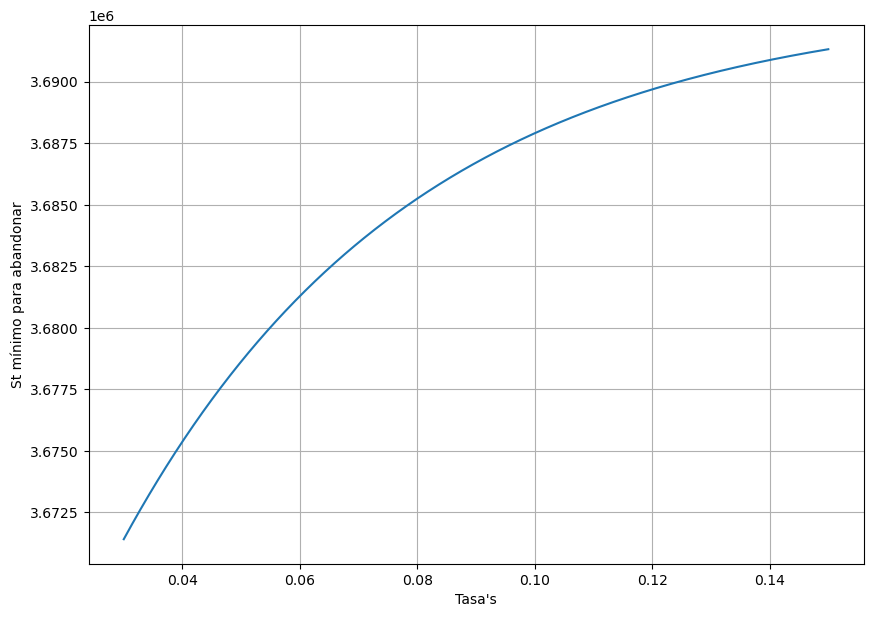

In [6]:
plt.figure(figsize=(10, 7))
Sts=np.linspace(0.03,0.15,1000)
StSens=pd.DataFrame(columns=["r"],index=Sts)
StSens["r"]=[FairValue(sq,St,k2,k,sigma,t,T,i) for i in Sts]
plt.plot(StSens)
plt.ylabel("St mínimo para abandonar")
plt.xlabel("Tasa's")
plt.grid()

In this graph we can see how the blue line marks the fair price of the option as the risk free rate changes, if we observe that the price is above the blue line we should exercise it since we have the opportunity to buy it at a better price already agreed in the option, therefore we earn the difference, when the price is equal to the blue line we should not exercise it since we have to pay the price of the premium and when the price is below our curve we definitely do not exercise it since we have the opportunity to buy it at a better price.

We also observe a relationship of how as our risk free rate increases the price of our option also increases.

**Second Scenario**
> We graph the change in the montly mortage payment if the interest rate was different.

/var/folders/dp/s2wc5c7n0pl5s9l2r_8tlhn00000gn/T/ipykernel_42985/3718024290.py:14: RuntimeWarning: invalid value encountered in log
  d2=(np.log(St/k3)+(theta-((sigma**2)/2))*(T-t))/(sigma*np.sqrt(T-t))


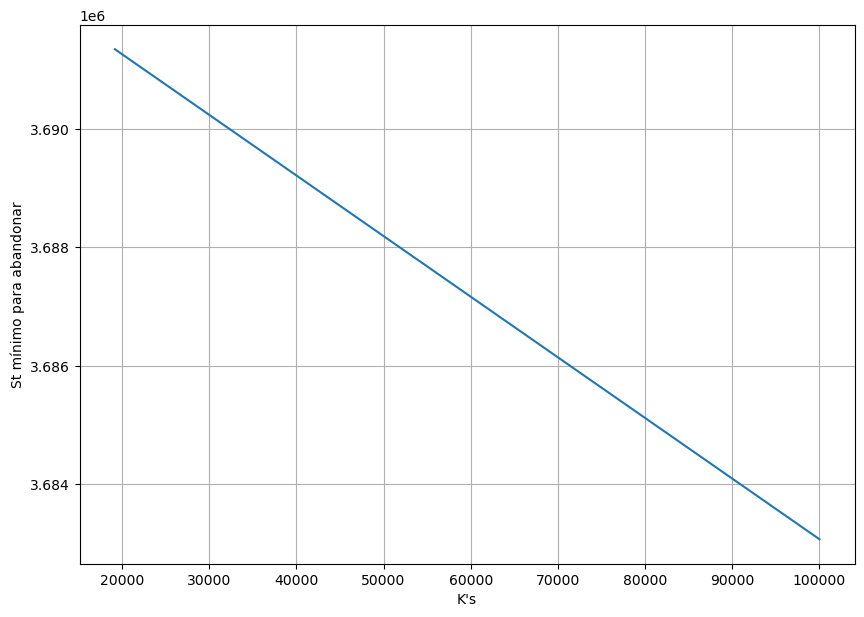

In [7]:
plt.figure(figsize=(10, 7))
Sts=np.linspace(5000,100000,1000)
StSens=pd.DataFrame(columns=["K"],index=Sts)
StSens["K"]=[FairValue(sq,St,k2,i,sigma,t,T,r) for i in Sts]
plt.plot(StSens)
plt.ylabel("St mínimo para abandonar")
plt.xlabel("K's")
plt.grid()

In this graph we observe the change of the fair price of the option with different Credit Loan, we can see how as the price of the loan increases the fair price is lower, so we should exercise the option when the price is above the blue line because we would be buying it cheaper than the one in the market, when the price is equal to the blue line we do not exercise the option because of the premium payment and when the price is lower than the blue line we do not exercise it because we have the opportunity to buy it cheaper than what we agreed in our option.

**Third Scenario**
> We graph the volatility of home values and how it affects the fair value of our option.


/var/folders/dp/s2wc5c7n0pl5s9l2r_8tlhn00000gn/T/ipykernel_42985/3718024290.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  d2=(np.log(St/k3)+(theta-((sigma**2)/2))*(T-t))/(sigma*np.sqrt(T-t))


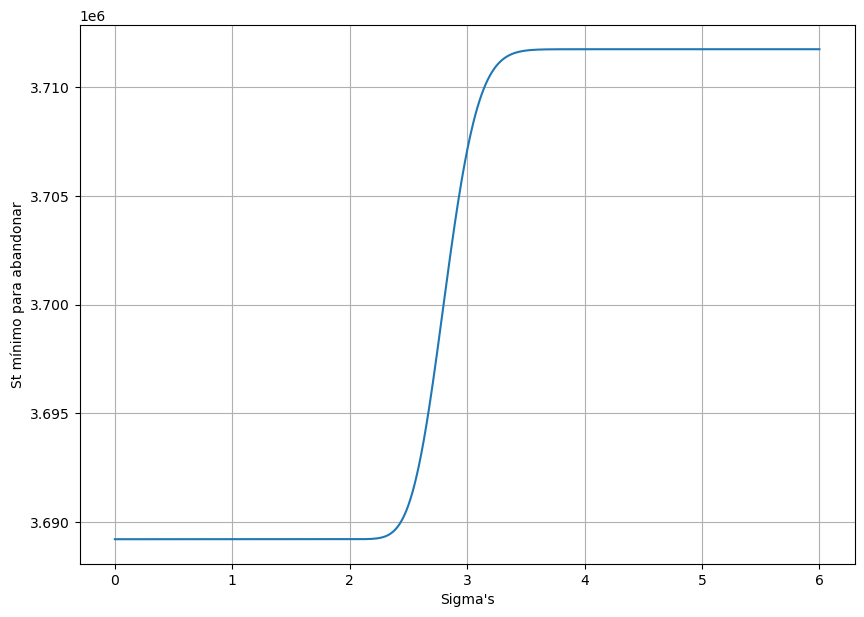

In [8]:
plt.figure(figsize=(10, 7))
Sts=np.linspace(0,6,1000)
StSens=pd.DataFrame(columns=["Sigma"],index=Sts)
StSens["Sigma"]=[FairValue(sq,St,k2,k,i,t,T,r) for i in Sts]
plt.plot(StSens)
plt.ylabel("St mínimo para abandonar")
plt.xlabel("Sigma's")
plt.grid()

In this last scenario we observe the changes of the fair price with respect to changes in the volatility of the houses, we can see how from 0 to 2.3% volatility we have very stable our fair price around 3.688, from 2.3% to 3.3% volatility our fair price increases a lot until 3.713 and remains stable after that.

In this scenario we should exercise the option when the price is above our blue line since we will be buying it cheaper because we have already established a price, when the price is equal to the fair price of the option we should not exercise it since we will be paying the premium and when the price is below the blue line we do not exercise it since we have the opportunity to buy it at a cheaper price than the fair price.

### Conclusion:

In conclusion the initial net present value calculation, determined that the most financially beneficial option was to rent and invest compared to buying a house with a mortgage. This is a product of high interest rates on home loans and low rental prices compared to the sale price of real estate in the area we analized. Therefore, the lower the interest rates and the rental value compared to home sales price, the more it would lean in the favor of buying a home.

When considering volatility and the real options approach, by renting we are paying for the possibility to take a future decision on buying a home. The fair value that we calculated was $3,689,219.20 and this equates to the total rent paid over 20 years. In monthly terms this is 15,371.75 mxn. Therefore any rental price under this makes it profitable to keep our options open. 

When calculating the option's sensitivity to the change in the risk free rate, the monthly mortgage payments and the volatility of home values. We can cleary see that when interests rates on loans are higher,the value of our option decreases because the rise in home prices can't outweigh the interest you are paying. On the otherhand, when the risk free rate which is the return on our investment increases, it makes renting more profitable and therefore increases the price of the option. In simple terms, this means we could pay more for rent.